In [1]:
import pandas as pd
train=pd.read_csv('bk_train.csv',parse_dates=["datetime"]) #object-> datetime64[ns]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [2]:
#년, 월, 일 추출 
train['datetime'].dt.year
train['datetime'].dt.month
train['datetime'].dt.day
train['datetime'].dt.hour
train['datetime'].dt.minute
#train['datetime'].dt.second
train['datetime'].dt.dayofweek
#월요일:0, 일요일:6 -> 주말은 5,6. 평일 1~4. 숫자 요일별로 구분 가능.


0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: datetime, Length: 10886, dtype: int64

In [3]:
#파이썬 자체(내장) 패키지 datetime 사용
import datetime
today="2020-01-17"
datetime.datetime.strptime(today, "%Y-%m-%d")


today="20200117"
datetime.datetime.strptime(today, "%Y%m%d").date()

datetime.datetime.today()
datetime.datetime.today().strftime("%Y")
datetime.datetime.today().strftime("%m")
datetime.datetime.today().strftime("%d")



'17'

In [4]:
today="2020-01-17 10:18:20.123"
datetime.datetime.strptime(today,"%Y-%m-%d %H:%M:%S.%f")
#시계열 타이어


datetime.datetime(2020, 1, 17, 10, 18, 20, 123000)

In [5]:
train.shape #(10886,12)

(10886, 12)

In [6]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [7]:
import pandas as pd
train=pd.read_csv('bk_train.csv',parse_dates=["datetime"]) #object-> datetime64[ns]
test=pd.read_csv('bk_test.csv',parse_dates=["datetime"])
train.info()
test.info()
train.shape #(10886, 12)
test.shape #(6493, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null

(6493, 9)

In [8]:
#train data, test data check duplicate values-> using duplicated() or duplicates()
train.duplicated("season", keep='first').value_counts()
train.duplicated("season", keep='last').value_counts()
train.duplicated("season", keep=False).value_counts()

# first: 첫번째거만 중복으로 안보고 나머지 중복인것들은 Ture
# last: 중복 시작된 첫번째껄 나타냄
# 중복은 모두 True
#duplicated는 시리즈로만 중복 체크 가능. 


#중복값 제거(1개만 살리고 나머진 중복은 제거.)
# train.drop_duplicates()
test.duplicated(["season","weather"], keep="first").value_counts()
test.duplicated(["season","weather"], keep="last").value_counts()
test.duplicated(["season","weather"], keep=False).value_counts()

True    6493
dtype: int64

In [9]:
#train data, test data check null
train.isnull().sum(axis=0)
train.notnull().sum(axis=0)
test.isnull().sum(axis=0)
test.notnull().sum(axis=0)

datetime      6493
season        6493
holiday       6493
workingday    6493
weather       6493
temp          6493
atemp         6493
humidity      6493
windspeed     6493
dtype: int64

In [10]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [11]:
#파이썬 자체(내장) 패키지 datetime 사용

import datetime
today="2020-01-17"
datetime.datetime.strptime(today, "%Y-%m-%d")


today="20200117"
datetime.datetime.strptime(today, "%Y%m%d").date()

datetime.datetime.today()
datetime.datetime.today().strftime("%Y")
datetime.datetime.today().strftime("%m")
datetime.datetime.today().strftime("%d")

#년, 월, 일 추출 
train['datetime'].dt.year
train['datetime'].dt.month
train['datetime'].dt.day
train['datetime'].dt.hour
train['datetime'].dt.minute
#train['datetime'].dt.second
train['datetime'].dt.dayofweek
#월요일:0, 일요일:6 -> 주말은 5,6. 평일 1~4. 숫자 요일별로 구분 가능.


0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: datetime, Length: 10886, dtype: int64

In [12]:
# datetime에서 년,월,일,시,분,초를 추출하여 각각의 column으로 구성
import datetime
train['Year']=train['datetime'].dt.year
train['Month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['Hour']=train['datetime'].dt.hour
train['Minute']=train['datetime'].dt.minute
train.head(10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,day,Hour,Minute
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0


In [41]:
#-년,월,일,시 에 따른 평균 대여량 구하기
#=> 분석 결과 reporting (ex. 여름에 대여량이 많다)
import matplotlib
#함수를 통해 각 컬럼의 평균 대여량
def get_time(data):
    train[data]=eval("train['datetime'].dt." + "{}".format(data))
    test[data]=eval("train['datetime'].dt." + "{}".format(data))
    time=train.groupby(data)['count'].mean()
    print(time)
    pd.DataFrame(time).plot(kind='bar', title="%s graph" %data)


#train.groupby('Year')['count'].mean() # #각 그룹들의 평균 추출
#groupby('그룹화 기준 컬럼')['열'].함수()

#def get_

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64


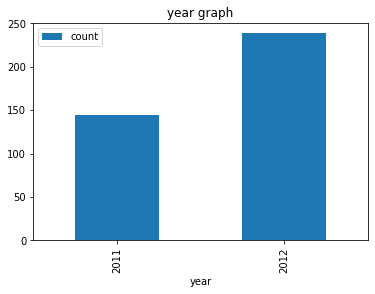

In [42]:
#year 평균 대여량
get_time('year') 
# Sharing bike in 2012 is bigger as less than twice in 2011.


month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


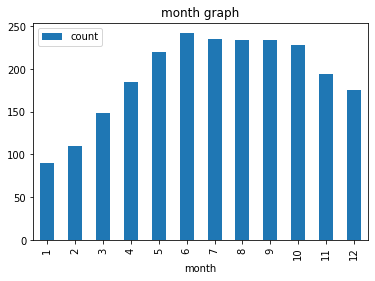

In [17]:
get_time('month')
# People tended to use sharing bike in Summer and Autumn. Exactly, Jun ~ Oct. 

day
1     180.333913
2     183.910995
3     194.696335
4     195.705575
5     189.765217
6     189.860140
7     183.773519
8     179.041812
9     187.897391
10    195.183566
11    195.679577
12    190.675393
13    194.160279
14    195.829268
15    201.527875
16    191.353659
17    205.660870
18    192.605684
19    192.311847
Name: count, dtype: float64


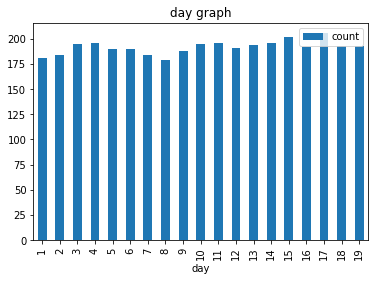

In [18]:
get_time('day')


hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64


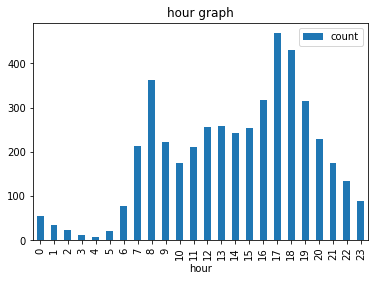

In [19]:
get_time('hour')
# Most people used sharing bike commute time at morning and afternoon.

In [20]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,day,Hour,Minute,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,2011,1,1


In [23]:
train.groupby("workingday")['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [24]:
train.groupby("holiday")['count'].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

In [30]:
a = train.groupby(["holiday","hour"])['count'].mean()

In [38]:
b = a[0:24]
c = a[24:48]

In [39]:
c

holiday  hour
1        0        66.769231
         1        43.230769
         2        28.000000
         3        12.416667
         4         7.384615
         5        13.230769
         6        38.923077
         7       111.000000
         8       229.000000
         9       211.307692
         10      230.538462
         11      274.846154
         12      318.384615
         13      326.384615
         14      321.076923
         15      292.769231
         16      314.846154
         17      368.000000
         18      344.538462
         19      280.230769
         20      219.153846
         21      181.846154
         22      141.384615
         23       72.461538
Name: count, dtype: float64

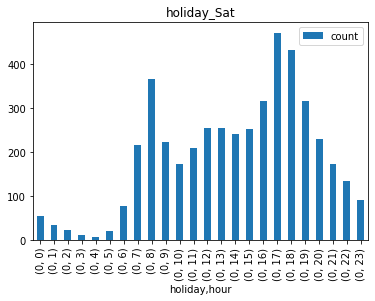

In [43]:
#Lots of people used sharing bike on the afternoon that the bar peaked at 6 p.m.. 
pd.DataFrame(b).plot(kind='bar', title='holiday_Sat')


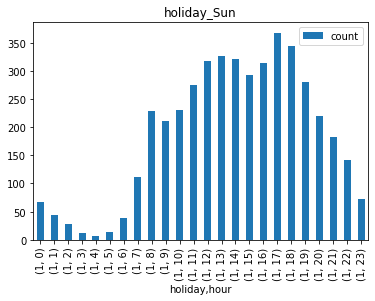

In [44]:
# Sharing bikes are used a lot of time on the afternoon. 
pd.DataFrame(c).plot(kind='bar', title='holiday_Sun')


In [66]:
def get_working(val):
    
    train_work=train.groupby([val])['count'].mean() 
    print(train_work)
get_working('holiday')


Series([], Name: count, dtype: int64)


In [ ]:
train.groupby(["holiday","hour"])['count'].mean()

In [ ]:
holi_ho=train.groupby(["holiday","hour"])['count'].mean()
holi_ho.shape
holi_ho[0:24]
holi_ho[24:48]

In [ ]:
=train.groupby(["holiday","hour"])['count'].mean()